DATA PREPROCESSING

FIRST WE ARE DOING PREPROCESSING FOR THE TRAIN DATASET

In [1]:
import pandas as pd

df=pd.read_csv("E:/projects/microsoft cyber security/GUIDE_Train.csv")
df.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [2]:
no_of_samples=500000
def samples_per_group(group):
    if len(group)>=no_of_samples:
        return group.sample(n=no_of_samples,random_state=42)
    else:
        return group
sampled_df = df.groupby('IncidentGrade',group_keys=False).apply(samples_per_group)    

C:\Users\nambi\AppData\Local\Temp\ipykernel_4724\504794154.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('IncidentGrade',group_keys=False).apply(samples_per_group)


In [3]:
sampled_df.dtypes

Id                      int64
OrgId                   int64
IncidentId              int64
AlertId                 int64
Timestamp              object
DetectorId              int64
AlertTitle              int64
Category               object
MitreTechniques        object
IncidentGrade          object
ActionGrouped          object
ActionGranular         object
EntityType             object
EvidenceRole           object
DeviceId                int64
Sha256                  int64
IpAddress               int64
Url                     int64
AccountSid              int64
AccountUpn              int64
AccountObjectId         int64
AccountName             int64
DeviceName              int64
NetworkMessageId        int64
EmailClusterId        float64
RegistryKey             int64
RegistryValueName       int64
RegistryValueData       int64
ApplicationId           int64
ApplicationName         int64
OAuthApplicationId      int64
ThreatFamily           object
FileName                int64
FolderPath

In [4]:
sampled_df['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    500000
FalsePositive     500000
TruePositive      500000
Name: count, dtype: int64

FINDING NULL VALUES AND REMOVE THAT FROM THE COLUMNS 

In [5]:
nullvalues = sampled_df.isnull().sum()
nullvalues

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques        838277
IncidentGrade               0
ActionGrouped         1499143
ActionGranular        1499143
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        1485147
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          1489043
FileName                    0
FolderPath

From the above code, we clearly seen that the null values presented columns are MitreTechniques,ActionGrouped,ActionGranular,EmailClusterId,ThreatFamily,ResourceType,Roles,AntispamDirection,SuspicionLevel,LastVerdict. Every column has more than 40% null values, so i decided to drop the columns due to that.

In [6]:
sampled_df.drop(columns=['MitreTechniques','ActionGrouped','ActionGranular','EmailClusterId','ThreatFamily','ResourceType','Roles','AntispamDirection','SuspicionLevel','LastVerdict'],inplace=True)

In [7]:
sampled_df.shape

(1500000, 35)

In [8]:
sampled_df.duplicated().sum()

np.int64(15984)

In [9]:
sampled_df.drop_duplicates(inplace=True)

In [10]:
sampled_df.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
dtype: int64

Now every columns in the dataset consist of no null values . Lets move onto the next thing .

In [11]:
sampled_df.dtypes

Id                     int64
OrgId                  int64
IncidentId             int64
AlertId                int64
Timestamp             object
DetectorId             int64
AlertTitle             int64
Category              object
IncidentGrade         object
EntityType            object
EvidenceRole          object
DeviceId               int64
Sha256                 int64
IpAddress              int64
Url                    int64
AccountSid             int64
AccountUpn             int64
AccountObjectId        int64
AccountName            int64
DeviceName             int64
NetworkMessageId       int64
RegistryKey            int64
RegistryValueName      int64
RegistryValueData      int64
ApplicationId          int64
ApplicationName        int64
OAuthApplicationId     int64
FileName               int64
FolderPath             int64
ResourceIdName         int64
OSFamily               int64
OSVersion              int64
CountryCode            int64
State                  int64
City          

In [12]:
# now we are taking four columns from the Timestamp column , so we are going to drop the timestamp column, because it is not needed for us .
sampled_df.drop(columns=['Timestamp'],inplace=True)

In [15]:
sampled_df.to_csv("traincleaned.csv")

EDA(EXPLORATORY DATA ANALYSIS)

**BIVARIATE ANALYSIS**

In [16]:
sampled_df.nunique()

Id                    395275
OrgId                   4813
IncidentId            292222
AlertId               690830
DetectorId              5834
AlertTitle             52402
Category                  20
IncidentGrade              3
EntityType                31
EvidenceRole               2
DeviceId               26274
Sha256                 33015
IpAddress             100699
Url                    35567
AccountSid            141643
AccountUpn            209550
AccountObjectId       138083
AccountName           144978
DeviceName             38634
NetworkMessageId      111929
RegistryKey              531
RegistryValueName        246
RegistryValueData        271
ApplicationId            447
ApplicationName          731
OAuthApplicationId       197
FileName               56397
FolderPath             25250
ResourceIdName           512
OSFamily                   4
OSVersion                 36
CountryCode              186
State                    956
City                    4587
Year          

Since all the columns are object, we are going to use the visualization for categorical vs categorical variables, we are going to use stacked bar plot, grouped bar plot, mosaicplot and facetgrid.

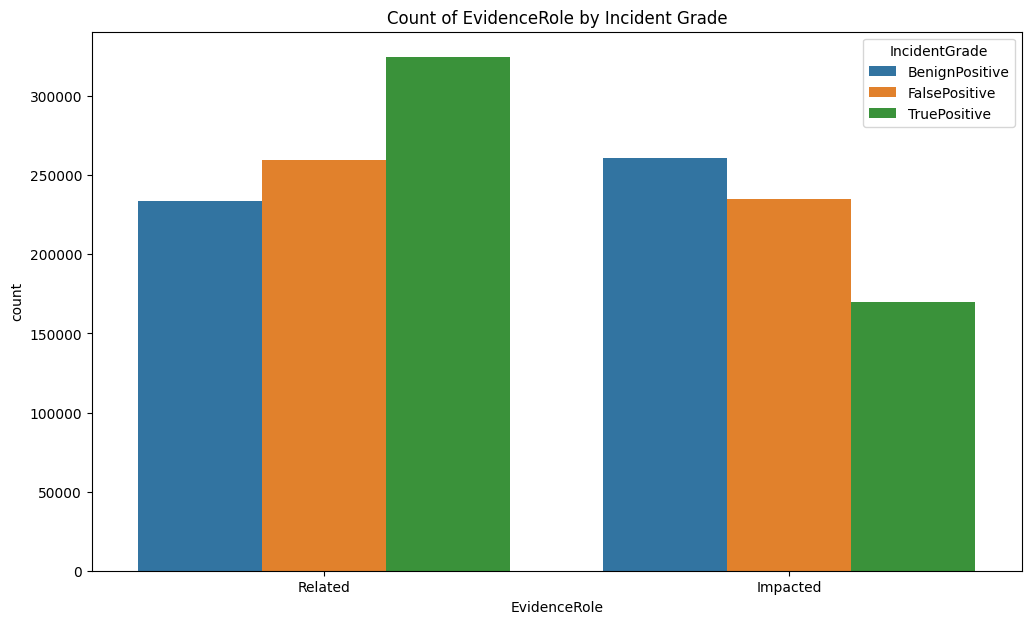

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,7))
sns.countplot(sampled_df,x='EvidenceRole',hue='IncidentGrade')
plt.title("Count of EvidenceRole by Incident Grade")
plt.xlabel("EvidenceRole")
plt.ylabel("count")
plt.legend(title=('IncidentGrade'))
plt.show()

**OBSERVATIONS**
* The Evidencetype **Related** received a higher cyber security threat when compare to related.


In [25]:
city_counts = sampled_df['City'].value_counts()
top10cities = city_counts.head(10)
top10cities

City
10630    1379596
0          15676
1           3424
3           3161
2           3062
5           2313
4           2223
13          2090
6           1910
14          1797
Name: count, dtype: int64

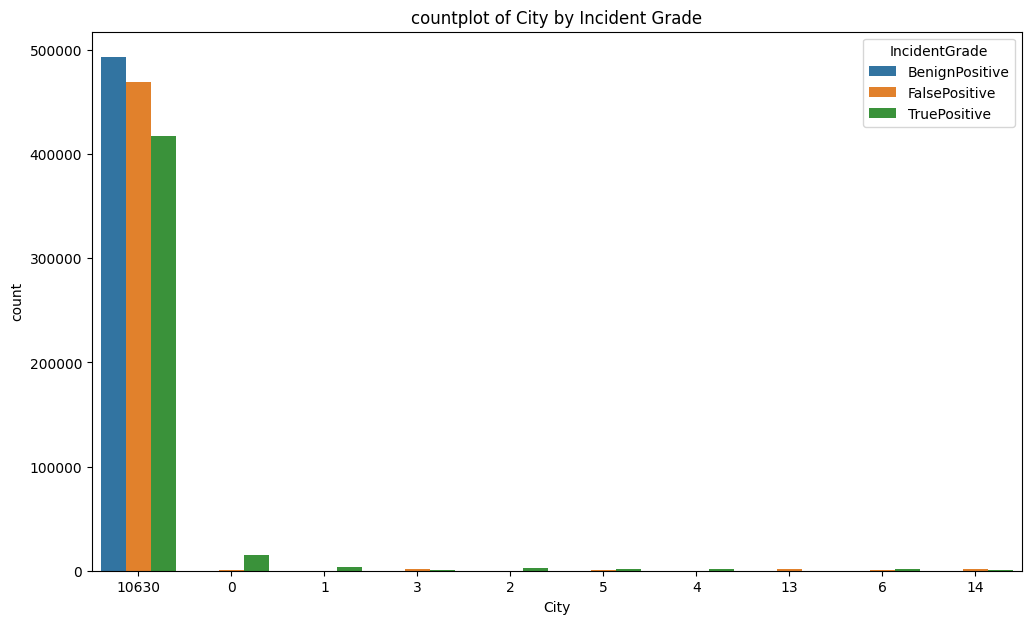

In [31]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,7))
sns.countplot(sampled_df,x='City',hue='IncidentGrade',order=top10cities.index)
plt.title("countplot of City by Incident Grade")
plt.xlabel("City")
plt.ylabel("count")
plt.legend(title=('IncidentGrade'))
plt.show()

**OBSERVATIONS**
* The City **10630** has a high cyber security threat, compared to other categories.
* It consist of more than 4,00,000 datas of true positive threats, which are highly risky.
* Hence concentrate on the city named **10630**

In [32]:
state_counts = sampled_df['State'].value_counts()
top10_state = state_counts.head(10)

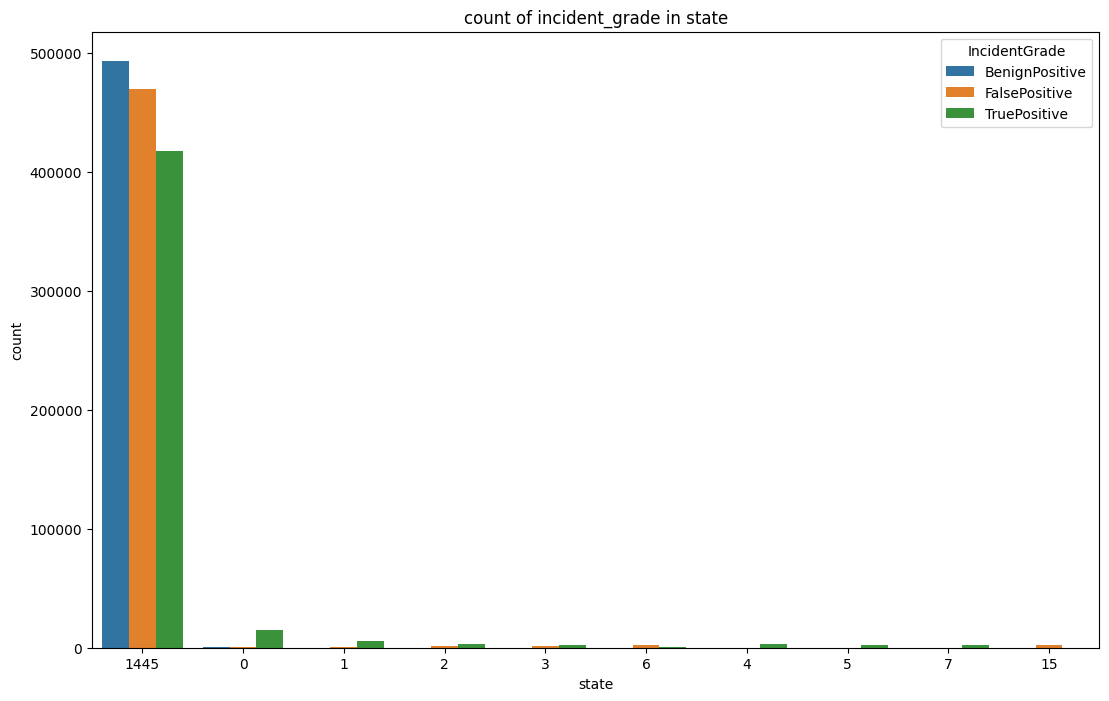

In [33]:
plt.figure(figsize=(13,8))
sns.countplot(sampled_df,x='State',hue='IncidentGrade',order=top10_state.index)
plt.title("count of incident_grade in state")
plt.xlabel("state")
plt.ylabel("count")
plt.legend(title=("IncidentGrade"))
plt.show()

**OBSERVATIONS**
 * THE STATE **1445** CONSIST OF HIGH NUMBER OF TRUE POSITIVE COMPARED TO ALL OTHER STATE WHICH ARE PRESENT IN THE TOP10.
 * IT CONSIST OF MORE THAN 4,00,000 TRUE POSITIVES WHICH IS MORE THREATENING THAN ANY OTHER STATES IN THE DATASET.

In [34]:
entity_count = sampled_df['EntityType'].value_counts()
top10entity = entity_count.head(10)

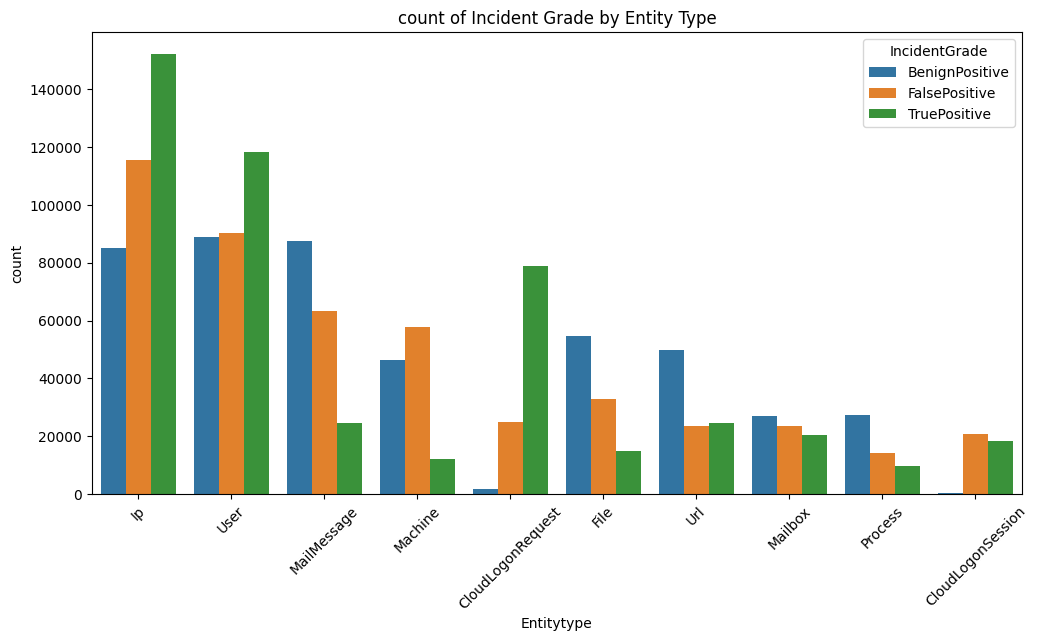

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(sampled_df,x='EntityType',hue='IncidentGrade',order=top10entity.index)
plt.title("count of Incident Grade by Entity Type")
plt.xlabel("Entitytype")
plt.ylabel("count")
plt.legend(title=("IncidentGrade"))
plt.xticks(rotation=45)
plt.show()

**OBSERVATIONS**
* The entity type **IP(INTERNT PROTOCOL)** contains a very large amount of true positive rates more than 1,40,000 threats comes under true positive.
* After that the entity type **user** contains around 1,20,000 true positive rates noted in the dataset. 

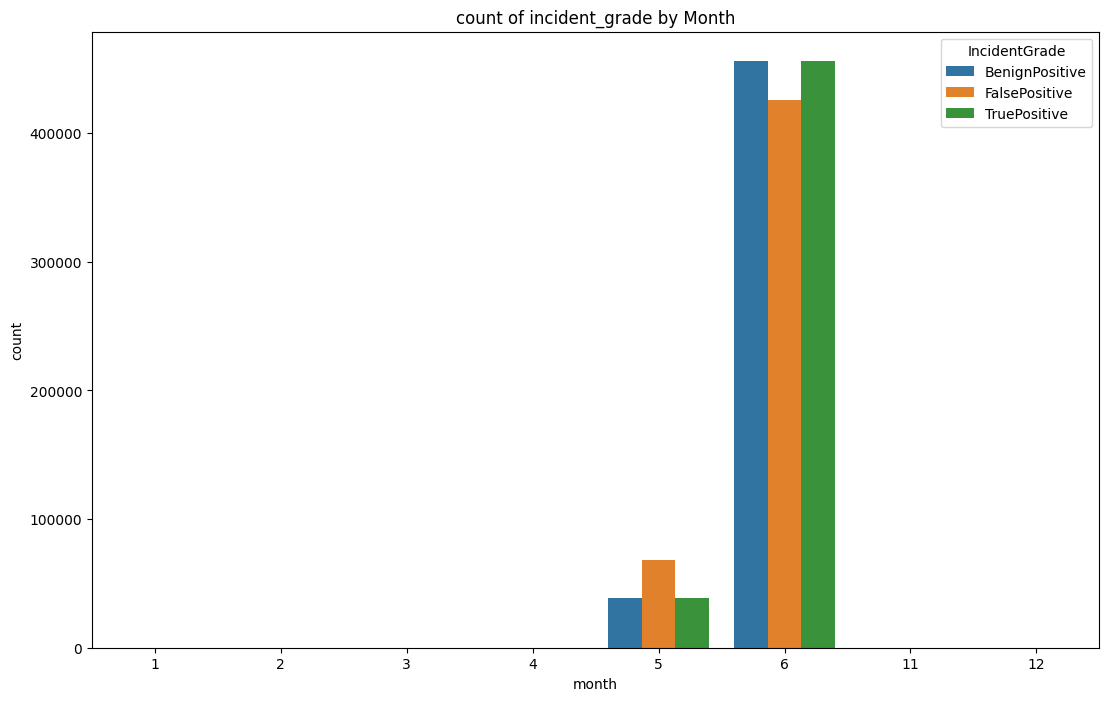

In [37]:
plt.figure(figsize=(13,8))
sns.countplot(sampled_df,x='Month',hue='IncidentGrade')
plt.title("count of incident_grade by Month")
plt.xlabel("month")
plt.ylabel("count")
plt.legend(title=("IncidentGrade"))
plt.show()

**OBSERVATIONS**
* IN THE JUNE MONTH HAS THE RECORD BREAKING THREAT OF OVER 4,00,000 THREATS COMPARED TO OTHER MONTHS.

**PREPROCESSING OF TEST DATASET**

In [1]:
import pandas as pd  
ds = pd.read_csv("E:/projects/microsoft cyber security/GUIDE_Test.csv")
ds.head()

C:\Users\nambi\AppData\Local\Temp\ipykernel_25132\2596182984.py:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv("E:/projects/microsoft cyber security/GUIDE_Test.csv")


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [2]:
no_of_samples=500000
def samples_per_group(group):
    if len(group)>=no_of_samples:
        return group.sample(n=no_of_samples,random_state=42)
    else:
        return group
sampled_test = ds.groupby('IncidentGrade',group_keys=False).apply(samples_per_group)    

C:\Users\nambi\AppData\Local\Temp\ipykernel_25132\3211408956.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_test = ds.groupby('IncidentGrade',group_keys=False).apply(samples_per_group)


In [4]:
sampled_test.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques        811299
IncidentGrade               0
ActionGrouped         1499227
ActionGranular        1499227
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        1485275
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          1489912
FileName                    0
FolderPath

In [5]:
# now we are taking four columns from the Timestamp column , so we are going to drop the timestamp column, because it is not needed for us .
sampled_test.drop(columns=['Timestamp'],inplace=True)

In [6]:
sampled_test.drop(columns=['MitreTechniques','ActionGrouped','ActionGranular','EmailClusterId','ThreatFamily','ResourceType','Roles','AntispamDirection','SuspicionLevel','LastVerdict'],inplace=True)

In [11]:
sampled_test.shape

(1500000, 34)

In [12]:
sampled_test.to_csv("testprocessed.csv")

In [32]:
sampled_df.to_csv('full_train.csv')

In [40]:
sampled_df.nunique()

Id                    395275
OrgId                   4813
IncidentId            292222
AlertId               690830
DetectorId              5834
AlertTitle             52402
Category                  20
IncidentGrade              3
EntityType                31
EvidenceRole               2
DeviceId               26274
Sha256                 33015
IpAddress             100699
Url                    35567
AccountSid            141643
AccountUpn            209550
AccountObjectId       138083
AccountName           144978
DeviceName             38634
NetworkMessageId      111929
RegistryKey              531
RegistryValueName        246
RegistryValueData        271
ApplicationId            447
ApplicationName          731
OAuthApplicationId       197
FileName               56397
FolderPath             25250
ResourceIdName           512
OSFamily                   4
OSVersion                 36
CountryCode              186
State                    956
City                    4587
Year          

In [7]:
sampled_test.drop(columns='Usage',inplace=True)

In [27]:
sampled_test.to_csv("testcleaned.csv")

In [24]:
sampled_df['RegistryValueData'].value_counts()

RegistryValueData
860    1483064
0          217
2          113
4           49
3           39
        ...   
599          1
830          1
23           1
187          1
152          1
Name: count, Length: 271, dtype: int64

In [15]:
sampled_df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City'],
      dtype='object')

In [25]:
reduced_col = ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
         'EntityType', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City']

In [51]:
k=sampled_df['AccountName'].nunique()>3
k

True

In [18]:
sampled_df.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
6543593,others,others,others,others,others,others,SuspiciousActivity,BenignPositive,others,Related,...,3421,881,289573,117668,3586,5,66,242,1445,10630
4900771,others,others,others,others,2,2,CommandAndControl,BenignPositive,others,Related,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3528594,others,others,others,others,others,others,Exfiltration,BenignPositive,User,Impacted,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3257098,others,others,others,others,1,1,InitialAccess,BenignPositive,others,Impacted,...,3421,881,289573,117668,3586,5,66,242,1445,10630
4094231,others,others,others,others,others,others,Execution,BenignPositive,User,Related,...,3421,881,289573,117668,3586,5,66,242,1445,10630


In [38]:
top_values ={}
for col in sampled_df.columns:
    if sampled_df[col].nunique()>15:
       top_values[col] =  sampled_df[col].value_counts().nlargest(3).index.to_list()
       sampled_df[col] = sampled_df[col].apply(lambda x:x if x in top_values[col] else "others")
sampled_df       
       
        
        



,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
6543593,others,others,others,others,others,others,SuspiciousActivity,BenignPositive,others,Related,...,3421,881,289573,117668,3586,5,66,242,1445,10630
4900771,others,others,others,others,2,2,others,BenignPositive,others,Related,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3528594,others,others,others,others,others,others,Exfiltration,BenignPositive,User,Impacted,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3257098,others,others,others,others,1,1,InitialAccess,BenignPositive,others,Impacted,...,3421,881,289573,117668,3586,5,66,242,1445,10630
4094231,others,others,others,others,others,others,others,BenignPositive,User,Related,...,3421,881,289573,117668,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164436,others,others,others,others,0,0,InitialAccess,TruePositive,others,Related,...,3421,881,289573,117668,3586,5,66,242,1445,10630
7165578,others,others,others,others,others,others,others,TruePositive,Ip,Related,...,3421,881,289573,117668,3586,5,66,others,others,others
5757080,others,others,others,others,others,others,others,TruePositive,Ip,Related,...,3421,881,289573,117668,3586,5,66,242,1445,10630
1192049,others,others,others,others,0,0,InitialAccess,TruePositive,others,Related,...,3421,881,289573,117668,3586,5,66,242,1445,10630


In [15]:
for col in sampled_df.columns:
    print(f'{col}',sampled_df[col].unique())

Id ['others' 609885356628 1666447311459 601295424398]
OrgId ['others' 4 7 0]
IncidentId ['others' 2 9 0]
AlertId ['others' 0 2 3]
DetectorId ['others' 2 1 0]
AlertTitle ['others' 2 1 0]
Category ['SuspiciousActivity' 'others' 'Exfiltration' 'InitialAccess']
IncidentGrade ['BenignPositive' 'FalsePositive' 'TruePositive']
EntityType ['others' 'User' 'MailMessage' 'Ip']
EvidenceRole ['Related' 'Impacted']
DeviceId [98799 'others' 1 0]
Sha256 [138268 'others' 0 1]
IpAddress [360606 'others' 0 3]
Url ['others' 160396 0 1]
AccountSid [441377 'others' 0 1]
AccountUpn [673934 'others' 2 1]
AccountObjectId [425863 'others' 0 1]
AccountName [453297 'others' 0 1]
DeviceName [153085 'others' 1 0]
NetworkMessageId [529644 'others' 3 0]
RegistryKey [1631 'others' 1 0]
RegistryValueName [635 'others' 0 1]
RegistryValueData [860 0 'others' 2]
ApplicationId [2251 1 'others' 0]
ApplicationName [3421 'others' 1 0]
OAuthApplicationId [881 'others' 0 1]
FileName [289573 'others' 1 0]
FolderPath [117668 'ot

In [41]:
for col in sampled_df.columns:
    sampled_df[col]= sampled_df[col].astype('object')

In [27]:
sampled_df.head()

,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,...,IpAddress_0,IpAddress_3,IpAddress_360606,IpAddress_others,IpAddress_nan,Url_0,Url_1,Url_160396,Url_others,Url_nan
6543593,673934,425863,453297,153085,529644,1631,635,860,2251,3421,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4900771,673934,425863,453297,153085,529644,1631,635,860,2251,3421,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3528594,others,others,others,153085,529644,1631,635,860,2251,3421,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3257098,others,others,others,153085,529644,1631,635,860,2251,3421,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4094231,others,others,others,153085,529644,1631,635,860,2251,3421,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [42]:
sampled_df.dtypes

Id                    object
OrgId                 object
IncidentId            object
AlertId               object
DetectorId            object
AlertTitle            object
Category              object
IncidentGrade         object
EntityType            object
EvidenceRole          object
DeviceId              object
Sha256                object
IpAddress             object
Url                   object
AccountSid            object
AccountUpn            object
AccountObjectId       object
AccountName           object
DeviceName            object
NetworkMessageId      object
RegistryKey           object
RegistryValueName     object
RegistryValueData     object
ApplicationId         object
ApplicationName       object
OAuthApplicationId    object
FileName              object
FolderPath            object
ResourceIdName        object
OSFamily              object
OSVersion             object
CountryCode           object
State                 object
City                  object
dtype: object

In [44]:
import joblib
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
for col in sampled_df.columns:
    encoders = ohe.fit_transform(sampled_df[[col]])
    sampled_df = sampled_df.drop(columns=[col])
    encoded_values = pd.DataFrame(encoders,columns=ohe.get_feature_names_out([col]))
    sampled_df = pd.concat([sampled_df,encoded_values],axis=1)

    joblib.dump(ohe,f'{col}_.pkl')
sampled_df.head()    


TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['int', 'str']

**FEATURE IMPORTANCE BY RANDOM FOREST CLASSIFIER**

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x = sampled_df.drop('IncidentGrade',axis=1)
y = sampled_df['IncidentGrade']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)


In [13]:
rfc = RandomForestClassifier()
model = rfc.fit(x_train,y_train)
#  feature importance of the model
feature_importance = model.feature_importances_
features_name = x.columns
feature_df = pd.DataFrame({
    'feature_name' : features_name,
    'Importance'    : feature_importance
}).sort_values(by='Importance',ascending=False)
feature_df

ValueError: could not convert string to float: 'InitialAccess'

In [35]:
#  According to the feature importance , we are going to take the top 15 columns from the sampled_df for model_training.
top_15col = feature_df['feature_name'].to_list()[0:15]
top_15col

['OrgId',
 'IncidentId',
 'DetectorId',
 'AlertId',
 'AlertTitle',
 'Day',
 'Id',
 'Category',
 'AccountUpn',
 'EntityType',
 'IpAddress',
 'AccountSid',
 'AccountObjectId',
 'AccountName',
 'NetworkMessageId']

In [36]:
final_traindf = sampled_df[top_15col+['IncidentGrade']]
final_traindf

,OrgId,IncidentId,DetectorId,AlertId,AlertTitle,Day,Id,Category,AccountUpn,EntityType,IpAddress,AccountSid,AccountObjectId,AccountName,NetworkMessageId,IncidentGrade
6543593,277,65528,3,46399,4,6,1451698948521,16,673934,29,360606,441377,425863,453297,529644,0
4900771,34,281453,2,600925,2,11,1082331761485,1,673934,29,360606,441377,425863,453297,529644,0
3528594,44,10287,50,11831,36,12,592705488171,7,964,30,360606,12348,12269,6409,529644,0
3257098,220,12976,1,16667,1,12,1176821040916,10,162975,20,360606,132652,128909,153229,529644,0
4094231,51,213504,39,800742,26,9,188978564275,6,17517,30,360606,11006,11035,11928,529644,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164436,22,330,0,170919,0,7,773094113955,10,673934,7,360606,441377,425863,453297,529644,2
7165578,11,544484,14,489105,12,14,154618822961,2,673934,15,5203,441377,425863,453297,529644,2
5757080,14,3742,29,2794,20,20,446676602839,9,673934,15,670,441377,425863,453297,529644,2
1192049,234,20127,0,333852,0,14,283467845915,10,673934,6,360606,441377,425863,453297,529644,2


**CROSS VALIDATION FOR DATASET**

In [105]:
x=final_traindf.drop('IncidentGrade',axis=1)
y=final_traindf['IncidentGrade']

In [106]:
# I am going to use stratified k-fold cross validation to eliminate the sampling bias in train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
k_folds = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

for train_index,test_index in k_folds.split(x,y):
    x_train,x_test = x.iloc[train_index],x.iloc[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]
    



**MODEL TRAINING**

**LOGISTIC REGRESSION**

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=2000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [46]:
lr_predict = lr.predict(x_test)

In [47]:
lr_prob = lr.predict_proba(x_test)
lr_prob

array([[0.30344286, 0.36576159, 0.33079555],
       [0.33452074, 0.3219714 , 0.34350785],
       [0.37579397, 0.35986593, 0.26434011],
       ...,
       [0.40114467, 0.29021218, 0.30864315],
       [0.27998486, 0.37767268, 0.34234245],
       [0.29048797, 0.36869621, 0.34081582]], shape=(148401, 3))

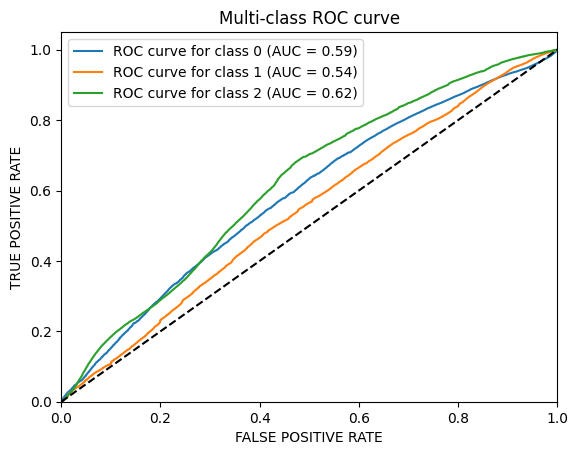

In [48]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
tpr={}
fpr ={}
roc_auc={}
for i in range(lr.classes_.shape[0]):
    fpr[i],tpr[i],_ = roc_curve(y_test==i,lr_prob[:,i])
    roc_auc[i] = roc_auc_score(y_test==i,lr_prob[:,i])
plt.figure()  
for i in range(lr.classes_.shape[0]):
    plt.plot(fpr[i],tpr[i],label=f'ROC curve for class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("Multi-class ROC curve")
plt.legend(loc='best')  
plt.show()


In [49]:
from sklearn.metrics import classification_report,accuracy_score
logisticreg = classification_report(y_test,lr_predict)
print(logisticreg)

              precision    recall  f1-score   support

           0       0.40      0.43      0.42     49476
           1       0.32      0.28      0.30     49453
           2       0.41      0.43      0.42     49472

    accuracy                           0.38    148401
   macro avg       0.38      0.38      0.38    148401
weighted avg       0.38      0.38      0.38    148401



**OBSERVATION**
* The accuracy of the logistic regression is 0.47, which is very low to predict the classes. So we move onto
another model.

In [76]:
import pickle
with open('lr.pkl','wb')as model1:
    pickle.dump(lr,model1)

**DecisionTreeClassifier**

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
dtc_pred = dtc.predict(x_test)
dtc_prob = dtc.predict_proba(x_test)

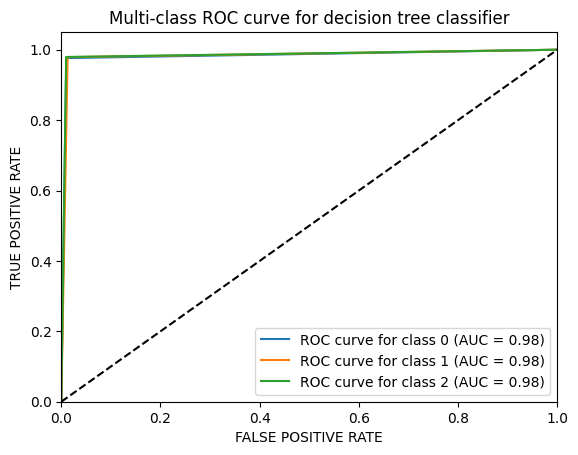

In [52]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
tpr={}
fpr ={}
roc_auc={}
for i in range(dtc.classes_.shape[0]):
    fpr[i],tpr[i],_ = roc_curve(y_test == i,dtc_prob[:,i])
    roc_auc[i] = roc_auc_score(y_test == i,dtc_prob[:,i])
plt.figure()  
for i in range(dtc.classes_.shape[0]):
    plt.plot(fpr[i],tpr[i],label=f'ROC curve for class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("Multi-class ROC curve for decision tree classifier")
plt.legend(loc='best')  
plt.show()


In [53]:
dtc_metrics = classification_report(y_test,dtc_pred)
print(dtc_metrics)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     49476
           1       0.97      0.98      0.98     49453
           2       0.98      0.98      0.98     49472

    accuracy                           0.98    148401
   macro avg       0.98      0.98      0.98    148401
weighted avg       0.98      0.98      0.98    148401



In [54]:
import pickle
with open('dtc.pkl','wb')as model2:
    pickle.dump(dtc,model2)

**RANDOM FOREST CLASSIFIER**

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
rfc_pred = rfc.predict(x_test)
rfc_proba = rfc.predict_proba(x_test)

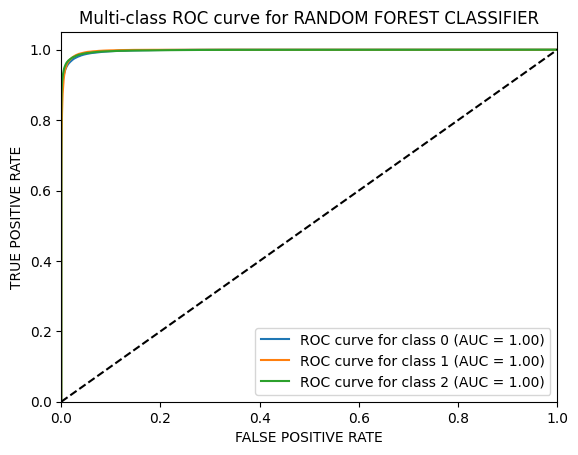

In [52]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
tpr={}
fpr ={}
roc_auc={}
for i in range(rfc.classes_.shape[0]):
    fpr[i],tpr[i],_ = roc_curve(y_test == i,rfc_proba[:,i])
    roc_auc[i] = roc_auc_score(y_test == i,rfc_proba[:,i])
plt.figure()  
for i in range(rfc.classes_.shape[0]):
    plt.plot(fpr[i],tpr[i],label=f'ROC curve for class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("Multi-class ROC curve for RANDOM FOREST CLASSIFIER")
plt.legend(loc='best')  
plt.show()


In [57]:
from sklearn.metrics import classification_report
rfc_report = classification_report(y_test,rfc_pred)
print(rfc_report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     49476
           1       0.96      0.97      0.97     49453
           2       0.98      0.96      0.97     49472

    accuracy                           0.97    148401
   macro avg       0.97      0.97      0.97    148401
weighted avg       0.97      0.97      0.97    148401



In [58]:
import pickle
with open('rfc.pkl','wb')as model3:
    pickle.dump(rfc,model3)

**GRADIENT BOOSTING CLASSIFIER**

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [60]:
gbc_pred = gbc.predict(x_test)
gbc_prob = gbc.predict_proba(x_test)

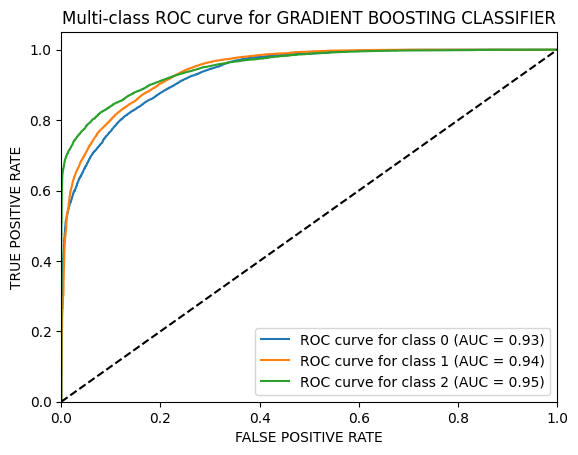

In [61]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
tpr={}
fpr ={}
roc_auc={}
for i in range(gbc.classes_.shape[0]):
    fpr[i],tpr[i],_ = roc_curve(y_test == i,gbc_prob[:,i])
    roc_auc[i] = roc_auc_score(y_test == i,gbc_prob[:,i])
plt.figure()  
for i in range(gbc.classes_.shape[0]):
    plt.plot(fpr[i],tpr[i],label=f'ROC curve for class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("Multi-class ROC curve for GRADIENT BOOSTING CLASSIFIER")
plt.legend(loc='best')  
plt.show()


In [62]:
gbc_report = classification_report(y_test,gbc_pred)
print(gbc_report)

              precision    recall  f1-score   support

           0       0.72      0.86      0.78     49476
           1       0.81      0.79      0.80     49453
           2       0.91      0.75      0.82     49472

    accuracy                           0.80    148401
   macro avg       0.81      0.80      0.80    148401
weighted avg       0.81      0.80      0.80    148401



In [63]:
with open('gbc.pkl','wb')as model4:
    pickle.dump(gbc,model4)

**EXTREME GRADIENT BOOST CLASSIFIER(XGBOOST)**

In [64]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [65]:
xgb_pred = xgb_classifier.predict(x_test)
xgb_prob = xgb_classifier.predict_proba(x_test)

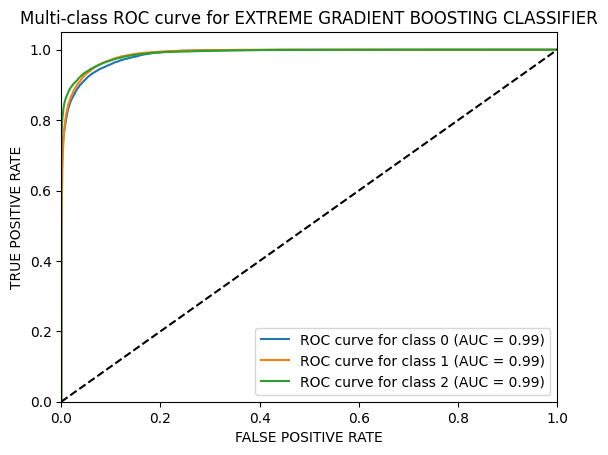

In [66]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
tpr={}
fpr ={}
roc_auc={}
for i in range(xgb_classifier.classes_.shape[0]):
    fpr[i],tpr[i],_ = roc_curve(y_test == i,xgb_prob[:,i])
    roc_auc[i] = roc_auc_score(y_test == i,xgb_prob[:,i])
plt.figure()  
for i in range(xgb_classifier.classes_.shape[0]):
    plt.plot(fpr[i],tpr[i],label=f'ROC curve for class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("Multi-class ROC curve for EXTREME GRADIENT BOOSTING CLASSIFIER")
plt.legend(loc='best')  
plt.show()


In [67]:
XGB_REPORT = classification_report(y_test,xgb_pred)
print(XGB_REPORT)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     49476
           1       0.90      0.93      0.92     49453
           2       0.94      0.91      0.93     49472

    accuracy                           0.92    148401
   macro avg       0.92      0.92      0.92    148401
weighted avg       0.92      0.92      0.92    148401



In [68]:
with open('xgb_classifier.pkl','wb')as model6:
    pickle.dump(xgb_classifier,model6)

In [69]:
# Now we are going to train the dataframe with all the columns and see the metrics, whether both gives good accuracy or not.
x=sampled_df.drop('IncidentGrade',axis=1)
y=sampled_df['IncidentGrade']

In [70]:
# I am going to use stratified k-fold cross validation to eliminate the sampling bias in train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
k_folds = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

for train_index,test_index in k_folds.split(x,y):
    x_train,x_test = x.iloc[train_index],x.iloc[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]
    



**DECISION TREE CLASSIFIER**

In [71]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [72]:
dtc_pred = dtc.predict(x_test)
dtc_prob = dtc.predict_proba(x_test)

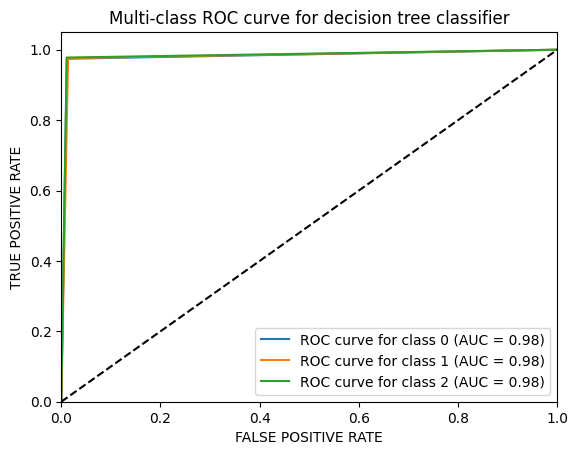

In [73]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
tpr={}
fpr ={}
roc_auc={}
for i in range(dtc.classes_.shape[0]):
    fpr[i],tpr[i],_ = roc_curve(y_test == i,dtc_prob[:,i])
    roc_auc[i] = roc_auc_score(y_test == i,dtc_prob[:,i])
plt.figure()  
for i in range(dtc.classes_.shape[0]):
    plt.plot(fpr[i],tpr[i],label=f'ROC curve for class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("Multi-class ROC curve for decision tree classifier")
plt.legend(loc='best')  
plt.show()


In [74]:
dtc_metrics = classification_report(y_test,dtc_pred)
print(dtc_metrics)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     49476
           1       0.97      0.98      0.97     49453
           2       0.98      0.98      0.98     49472

    accuracy                           0.98    148401
   macro avg       0.98      0.98      0.98    148401
weighted avg       0.98      0.98      0.98    148401



In [75]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [76]:
xgb_pred = xgb_classifier.predict(x_test)
xgb_prob = xgb_classifier.predict_proba(x_test)

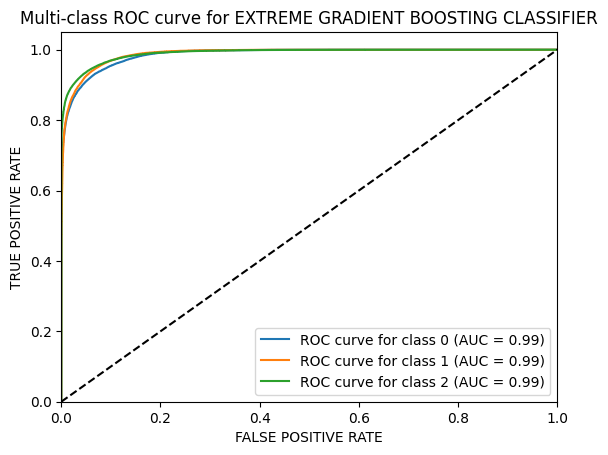

In [77]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
tpr={}
fpr ={}
roc_auc={}
for i in range(xgb_classifier.classes_.shape[0]):
    fpr[i],tpr[i],_ = roc_curve(y_test == i,xgb_prob[:,i])
    roc_auc[i] = roc_auc_score(y_test == i,xgb_prob[:,i])
plt.figure()  
for i in range(xgb_classifier.classes_.shape[0]):
    plt.plot(fpr[i],tpr[i],label=f'ROC curve for class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("Multi-class ROC curve for EXTREME GRADIENT BOOSTING CLASSIFIER")
plt.legend(loc='best')  
plt.show()


In [78]:
XGB_REPORT = classification_report(y_test,xgb_pred)
print(XGB_REPORT)

              precision    recall  f1-score   support

           0       0.90      0.91      0.90     49476
           1       0.90      0.93      0.91     49453
           2       0.94      0.90      0.92     49472

    accuracy                           0.91    148401
   macro avg       0.91      0.91      0.91    148401
weighted avg       0.91      0.91      0.91    148401



**FROM COMPARING THE ACCURACY OF THE MODEL BY TRAINING BOTH THE TOP15 COLUMN AND FULL DATASET.
THE ACCURACY WAS STILL THE SAME. SO I DECIDED TO GO WITH THE TOP15 COLUMN FOR THE TESTING DATASET.**

**ENCODING AND TESTING OF TEST DATASET**

In [36]:
top_15col=df.columns

In [ ]:
top_15col = ['OrgId', 'IncidentId', 'DetectorId', 'AlertId', 'AlertTitle', 'Day',
       'Id', 'Category', 'AccountUpn', 'EntityType', 'IpAddress', 'AccountSid',
       'AccountObjectId', 'AccountName', 'NetworkMessageId']

In [37]:
top15_test = sampled_test[top_15col]

In [39]:
import joblib
cat_le = joblib.load('Category_.pkl')
top15_test['Category'] = cat_le.transform(top15_test['Category'])

C:\Users\nambi\AppData\Local\Temp\ipykernel_9632\4056263781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top15_test['Category'] = cat_le.transform(top15_test['Category'])


In [40]:
Inc_le = joblib.load('IncidentGrade_.pkl')
top15_test['IncidentGrade'] = Inc_le.transform(top15_test['IncidentGrade'])

C:\Users\nambi\AppData\Local\Temp\ipykernel_9632\1259620690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top15_test['IncidentGrade'] = Inc_le.transform(top15_test['IncidentGrade'])


In [41]:
Entity_le = joblib.load('EntityType_.pkl')
top15_test['EntityType'] = Entity_le.transform(top15_test['EntityType'])

C:\Users\nambi\AppData\Local\Temp\ipykernel_9632\1806045126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top15_test['EntityType'] = Entity_le.transform(top15_test['EntityType'])


In [42]:
top15_test

,OrgId,IncidentId,DetectorId,AlertId,AlertTitle,Day,Id,Category,AccountUpn,EntityType,IpAddress,AccountSid,AccountObjectId,AccountName,NetworkMessageId,IncidentGrade
1789205,24,4855,5,336451,21,3,1408749277327,16,673934,15,2263,441377,425863,453297,529644,0
1803483,2,4996,15,3524,13,12,420906798555,7,673934,11,360606,441377,425863,453297,529644,0
3224264,34,281982,3,625466,4,13,188978563933,16,673934,15,237,441377,425863,453297,529644,0
2792069,133,13650,2,277673,2,5,489626276782,1,673934,29,360606,441377,425863,453297,529644,0
2530021,139,1467,10,6389,8,7,1245540519474,10,38830,19,360606,441377,425863,453297,27906,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653594,22,154,0,175694,0,11,850403525280,10,673934,15,31470,441377,425863,453297,529644,2
553286,252,46882,4,393404,3,8,42949674211,10,673934,15,6855,441377,425863,453297,529644,2
2440528,76,147,0,1165031,0,13,541165882398,10,673934,6,360606,441377,425863,453297,529644,2
2992712,5,188,4,73597,3,4,481036339557,10,131,30,360606,89,82,105,529644,2


In [43]:
x = top15_test.drop('IncidentGrade',axis=1)
y = top15_test['IncidentGrade']

In [87]:
with open('rfc.pkl','rb')as model3:
    rf_model = pickle.load(model3)

In [88]:
rfc_test_pred = rf_model.predict(x)
rfc_test_prob = rf_model.predict_proba(x)

In [89]:
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix
rfc_test_report = classification_report(y,rfc_test_pred)
print(rfc_test_report)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90    500000
           1       0.92      0.90      0.91    500000
           2       0.93      0.92      0.93    500000

    accuracy                           0.91   1500000
   macro avg       0.91      0.91      0.91   1500000
weighted avg       0.91      0.91      0.91   1500000



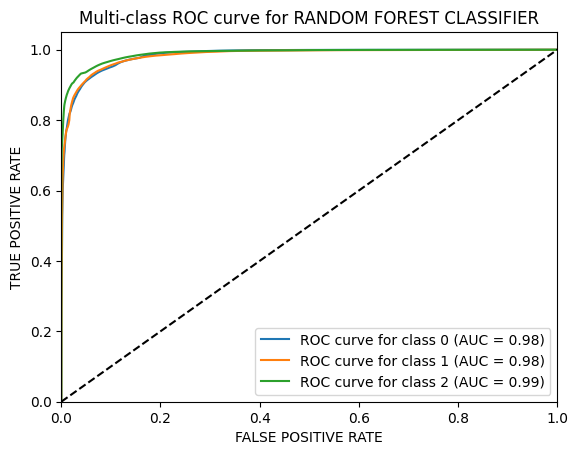

In [90]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
tpr={}
fpr ={}
roc_auc={}
for i in range(rf_model.classes_.shape[0]):
    fpr[i],tpr[i],_ = roc_curve(y == i,rfc_test_prob[:,i])
    roc_auc[i] = roc_auc_score(y == i,rfc_test_prob[:,i])
plt.figure()  
for i in range(rf_model.classes_.shape[0]):
    plt.plot(fpr[i],tpr[i],label=f'ROC curve for class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("Multi-class ROC curve for RANDOM FOREST CLASSIFIER")
plt.legend(loc='best')  
plt.show()


**OBSERVATION**:
THE MODEL WILL GIVE A VERY GOOD ACCURACY OF 0.98 AND THE MODEL CLASSIFIES ALL THE CLASSES MOSTLY CORRECTLY.

In [91]:
with open('dtc.pkl','rb')as model2:
    dtc_model = pickle.load(model2)

In [92]:
dtc_test_pred = dtc_model.predict(x)
dtc_test_prob = dtc_model.predict_proba(x)

In [93]:
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix
dtc_test_report = classification_report(y,dtc_test_pred)
print(dtc_test_report)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89    500000
           1       0.90      0.87      0.88    500000
           2       0.91      0.92      0.92    500000

    accuracy                           0.90   1500000
   macro avg       0.90      0.90      0.90   1500000
weighted avg       0.90      0.90      0.90   1500000



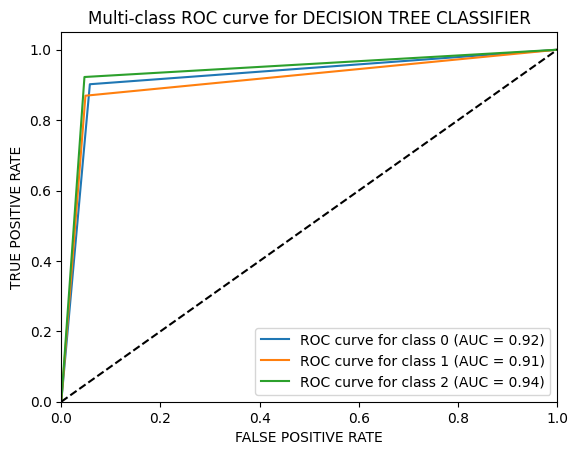

In [94]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
tpr={}
fpr ={}
roc_auc={}
for i in range(dtc_model.classes_.shape[0]):
    fpr[i],tpr[i],_ = roc_curve(y == i,dtc_test_prob[:,i])
    roc_auc[i] = roc_auc_score(y == i,dtc_test_prob[:,i])
plt.figure()  
for i in range(dtc_model.classes_.shape[0]):
    plt.plot(fpr[i],tpr[i],label=f'ROC curve for class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("Multi-class ROC curve for DECISION TREE CLASSIFIER")
plt.legend(loc='best')  
plt.show()


**OBSERVATIONS**: THE DECISION TREE GIVES A VERY GOOD ACCURACY OF 0.90 AND IT ALSO CLASSIFIES THE CLASSES THAT PRESNT IN THE MODEL ALMOST CORRECTLY.

In [98]:
with open('xgb_classifier.pkl','rb')as model5:
    xgbc_model = pickle.load(model5)

In [99]:
xgbc_test_pred = xgbc_model.predict(x)
xgbc_test_prob = xgbc_model.predict_proba(x)

In [100]:
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix
xgbc_test_report = classification_report(y,xgbc_test_pred)
print(xgbc_test_report)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88    500000
           1       0.87      0.90      0.89    500000
           2       0.93      0.90      0.91    500000

    accuracy                           0.89   1500000
   macro avg       0.89      0.89      0.89   1500000
weighted avg       0.89      0.89      0.89   1500000



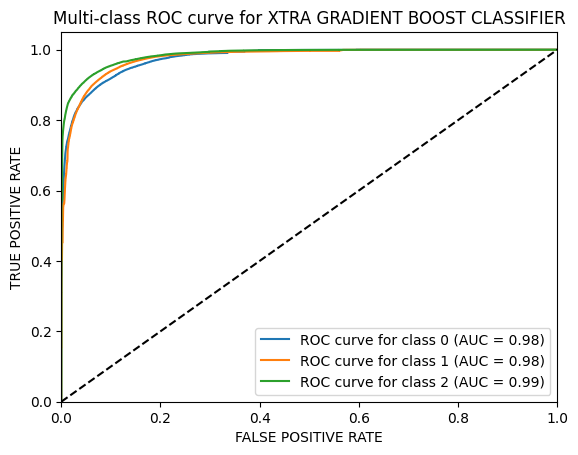

In [101]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
tpr={}
fpr ={}
roc_auc={}
for i in range(xgbc_model.classes_.shape[0]):
    fpr[i],tpr[i],_ = roc_curve(y == i,xgbc_test_prob[:,i])
    roc_auc[i] = roc_auc_score(y == i,xgbc_test_prob[:,i])
plt.figure()  
for i in range(xgbc_model.classes_.shape[0]):
    plt.plot(fpr[i],tpr[i],label=f'ROC curve for class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("Multi-class ROC curve for XTRA GRADIENT BOOST CLASSIFIER")
plt.legend(loc='best')  
plt.show()


**OBSERVATIONS**: THE ROC CURVE SCORE AND THE ACCURCAY OF XG BOOST WILL BE GOOD AROUND 0.89. SO THE MODEL PREDICT GOOD IN THE TESTING DATASET.

**AMONG ALL THE MODEL, RANDOM FOREST CLASSIFIER GOT A VERY GOOD ACCURACY OF 0.91 AND THE AUC SCORE OF 0.98 FOR ALL THE CLASSES THAT PRESENT IN THE TARGET COLUMN OF INCIDENT GRADE.
SO WE TOOK THE RANDOM FOREST CLASSIFIER FOR THE HYPER PARAMETER TUNING OF THE MODEL TO ACHIEVE WHICH PARAMETERS ARE REQUIRED TO GET A VERY GOOD ACCURACY.**

In [ ]:
# PARAMETER OF RANDOM FOREST CLASSIFIER:


In [21]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start=10,stop=100,num=12)]
criterion = ["gini","entropy","log_loss"]
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_samples_split = [2,5,10,15]
min_samples_leaf =[1,2,4,5,10]
max_features = ["sqrt","log2"]
bootstrap = [True,False]



In [22]:
random_grid = {
    "n_estimators" : n_estimators,
    "criterion"    : criterion,
    "max_depth"    : max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "max_features" : max_features,
    "bootstrap"   : bootstrap
    
    
}

In [4]:
import pickle
with open('rfc.pkl','rb')as model3:
    rf_model = pickle.load(model3)


In [6]:
import pandas as pd
df = pd.read_csv("top15_train.csv")


In [10]:
df

,OrgId,IncidentId,DetectorId,AlertId,AlertTitle,Day,Id,Category,AccountUpn,EntityType,IpAddress,AccountSid,AccountObjectId,AccountName,NetworkMessageId,IncidentGrade
0,277,65528,3,46399,4,6,1451698948521,16,673934,29,360606,441377,425863,453297,529644,0
1,34,281453,2,600925,2,11,1082331761485,1,673934,29,360606,441377,425863,453297,529644,0
2,44,10287,50,11831,36,12,592705488171,7,964,30,360606,12348,12269,6409,529644,0
3,220,12976,1,16667,1,12,1176821040916,10,162975,20,360606,132652,128909,153229,529644,0
4,51,213504,39,800742,26,9,188978564275,6,17517,30,360606,11006,11035,11928,529644,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484011,22,330,0,170919,0,7,773094113955,10,673934,7,360606,441377,425863,453297,529644,2
1484012,11,544484,14,489105,12,14,154618822961,2,673934,15,5203,441377,425863,453297,529644,2
1484013,14,3742,29,2794,20,20,446676602839,9,673934,15,670,441377,425863,453297,529644,2
1484014,234,20127,0,333852,0,14,283467845915,10,673934,6,360606,441377,425863,453297,529644,2


In [9]:
df.drop(columns="Unnamed: 0",inplace=True)

In [11]:
x=df.drop('IncidentGrade',axis=1)
y=df['IncidentGrade']

In [12]:
# I am going to use stratified k-fold cross validation to eliminate the sampling bias in train_test_split
from sklearn.model_selection import StratifiedKFold
k_folds = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

for train_index,test_index in k_folds.split(x,y):
    x_train,x_test = x.iloc[train_index],x.iloc[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]
    



In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score
rf_randomcv = RandomizedSearchCV(estimator=rf_model,param_distributions=random_grid,n_iter=10,n_jobs=1,cv=5,verbose=2,random_state=42)
rf_randomcv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=34; total time= 2.1min
[CV] END bootstrap=False, criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=34; total time= 2.0min
[CV] END bootstrap=False, criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=34; total time= 2.4min
[CV] END bootstrap=False, criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=34; total time= 2.3min
[CV] END bootstrap=False, criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=34; total time= 2.9min
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=15, n_estimators=75; total time= 2.1min
[C

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [10, 18, 26, 34, 42, 50,
                                                         59, 67, 75, 83, 91,
                                                         100]},
                   random_state=42, verbose=2)

In [25]:
rf_best=rf_randomcv.best_estimator_

In [26]:
prediction = rf_best.predict(x_test)

In [28]:
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix
rfbest_test_report = classification_report(y_test,prediction)
print(rfbest_test_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     49476
           1       0.96      0.97      0.96     49453
           2       0.98      0.95      0.96     49472

    accuracy                           0.96    148401
   macro avg       0.96      0.96      0.96    148401
weighted avg       0.96      0.96      0.96    148401



In [44]:
rfbest_test_pred = rf_best.predict(x)
rfbest_test_prob = rf_best.predict_proba(x)

In [45]:
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix
rfbest_test_report = classification_report(y,rfbest_test_pred)
print(rfbest_test_report)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90    500000
           1       0.91      0.89      0.90    500000
           2       0.93      0.91      0.92    500000

    accuracy                           0.91   1500000
   macro avg       0.91      0.91      0.91   1500000
weighted avg       0.91      0.91      0.91   1500000



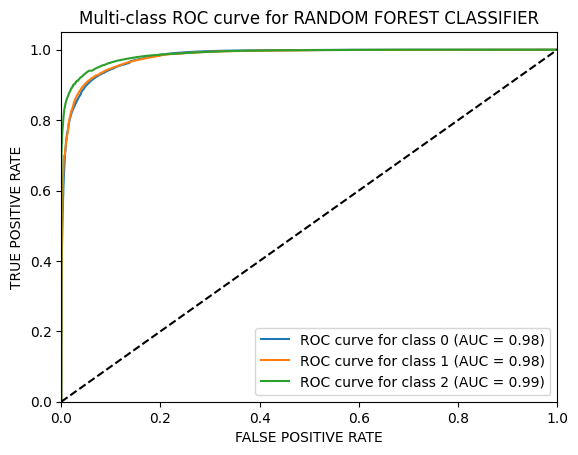

In [46]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
tpr={}
fpr ={}
roc_auc={}
for i in range(rf_best.classes_.shape[0]):
    fpr[i],tpr[i],_ = roc_curve(y == i,rfbest_test_prob[:,i])
    roc_auc[i] = roc_auc_score(y == i,rfbest_test_prob[:,i])
plt.figure()  
for i in range(rf_best.classes_.shape[0]):
    plt.plot(fpr[i],tpr[i],label=f'ROC curve for class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("Multi-class ROC curve for RANDOM FOREST CLASSIFIER")
plt.legend(loc='best')  
plt.show()


In [50]:
with open('rf_best.pkl','wb')as best_model:
    pickle.dump(rf_best,best_model)

In [2]:
import pandas as pd
ds=pd.read_csv("preproccessed_data.csv")

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in ds.columns:
    ds[col]=le.fit_transform(ds[col])
ds    

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day,Dayname
0,17893,0,247,183467,7,6,10,2,12,1,...,421,3,31,15,13,10,1,5,8,3
1,17904,74,32,435353,0,0,10,2,6,1,...,421,3,31,168,800,3131,1,5,8,3
2,17821,111,13315,8355,10,8,10,0,16,0,...,421,3,31,168,800,3131,1,5,14,2
3,17827,16,167,421743,804,31246,7,1,13,0,...,421,3,31,168,800,3131,1,5,4,6
4,17871,12,1620,1252,16,1170,9,0,12,1,...,421,3,31,168,800,3131,1,4,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946544,17855,7,2174,637,22,10,9,1,12,1,...,421,3,31,168,800,3131,1,4,24,2
946545,17797,1,11,440424,0,0,10,2,6,1,...,421,3,31,168,800,3131,1,5,8,3
946546,17845,51,2405,1593,177,149,4,2,26,0,...,421,3,31,168,800,3131,1,5,3,5
946547,17878,57,294,138759,11,9,10,0,15,1,...,421,3,31,168,800,3131,1,5,4,6


In [4]:
from sklearn.feature_selection import chi2
x= ds.drop('IncidentGrade',axis=1)
y= ds['IncidentGrade']

In [7]:
chi_value,pvalue = chi2(x,y)
featureimportance = pd.DataFrame({'columns': x.columns,
                                  'chi_square value': chi_value,
                                  'p-value': pvalue})
featureimportance = featureimportance.sort_values(by='chi_square value',ascending = False)
pd.set_option('display.float_format',lambda x : f'{x:.10f}')
featureimportance

,columns,chi_square value,p-value
3,AlertId,3880644301.4917907715,0.0000000000
2,IncidentId,3579988373.2248697281,0.0000000000
5,AlertTitle,523069755.4778823853,0.0000000000
11,IpAddress,294511215.7525383234,0.0000000000
15,AccountObjectId,226118806.2275542617,0.0000000000
13,AccountSid,218534139.5976659656,0.0000000000
16,AccountName,188300641.0347102880,0.0000000000
18,NetworkMessageId,103618926.9412536621,0.0000000000
25,FileName,71493540.5401499122,0.0000000000
14,AccountUpn,48275508.4375822023,0.0000000000


In [10]:
featureimportance['columns']

3                AlertId
2             IncidentId
5             AlertTitle
11             IpAddress
15       AccountObjectId
13            AccountSid
16           AccountName
18      NetworkMessageId
25              FileName
14            AccountUpn
26            FolderPath
17            DeviceName
10                Sha256
4             DetectorId
1                  OrgId
32                  City
12                   Url
31                 State
9               DeviceId
30           CountryCode
0                     Id
35                   Day
6               Category
7             EntityType
8           EvidenceRole
23       ApplicationName
22         ApplicationId
29             OSVersion
19           RegistryKey
28              OSFamily
36               Dayname
34                 Month
27        ResourceIdName
21     RegistryValueData
20     RegistryValueName
24    OAuthApplicationId
33                  Year
Name: columns, dtype: object

ENCODING OF CATEGORICAL VARIABLES

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df['EntityType'] = le.fit_transform(df['EntityType'])
df['EvidenceRole'] = le.fit_transform(df['EvidenceRole'])

In [14]:
df.drop(columns='Dayname',inplace=True)

In [1]:
df

NameError: name 'df' is not defined

df

UNIVARIATE ANALYSIS

In [ ]:
df.describe()
# these are the descriptive statistics for the numerical column of the dataset

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day
count,9.465490e+05,946549.000000,946549.000000,9.465490e+05,946549.000000,946549.000000,946549.000000,946549.000000,946549.000000,946549.000000,...,946549.000000,946549.000000,946549.000000,946549.000000,946549.000000,946549.000000,946549.000000,946549.000000,946549.000000,946549.000000
mean,8.421020e+11,178.121475,69643.347282,4.033506e+05,106.874674,2783.019218,95691.067530,128611.883102,285577.338811,150295.273262,...,107558.314732,3583.589099,4.900168,64.677406,223.708991,1351.772954,9938.392815,2023.999985,5.909267,9.816088
std,4.968177e+11,376.313215,119018.781558,4.563038e+05,420.097643,10938.511589,16291.349547,34172.858408,141326.372103,37582.826731,...,32297.312897,88.108168,0.697976,9.240491,62.747170,350.494449,2603.019434,0.003846,0.290415,6.167749
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023.000000,1.000000,1.000000
25%,4.123170e+11,10.000000,495.000000,2.287900e+04,2.000000,2.000000,98799.000000,138268.000000,360606.000000,160396.000000,...,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,2024.000000,6.000000,5.000000
50%,8.332240e+11,44.000000,10101.000000,2.149270e+05,9.000000,11.000000,98799.000000,138268.000000,360606.000000,160396.000000,...,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,2024.000000,6.000000,9.000000
75%,1.271310e+12,170.000000,83305.000000,6.665950e+05,45.000000,174.000000,98799.000000,138268.000000,360606.000000,160396.000000,...,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,2024.000000,6.000000,12.000000
max,1.709400e+12,6043.000000,599627.000000,1.721456e+06,9518.000000,113106.000000,98799.000000,138268.000000,360606.000000,160396.000000,...,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,2024.000000,12.000000,31.000000


In [3]:
df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Year', 'Month', 'Day', 'Dayname'],
      dtype='object')